In [ ]:
# import pytesseract
# pytesseract.pytesseract.tesseract_cmd = 'C:/OCR/Tesseract-OCR/tesseract.exe'  # your path may be different


aspect Ratio 4.428571428571429
381193.0


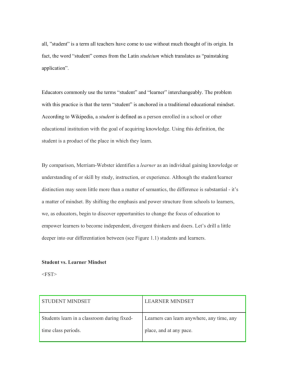

aspect Ratio 5.4033613445378155
304545.0


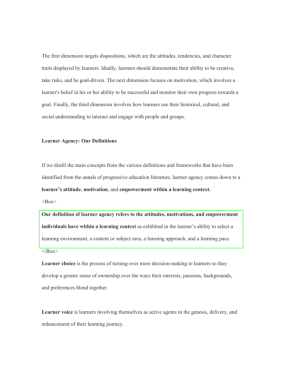

aspect Ratio 7.987577639751553
205600.0


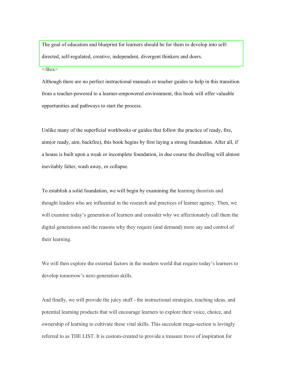

aspect Ratio 5.4033613445378155
304545.0


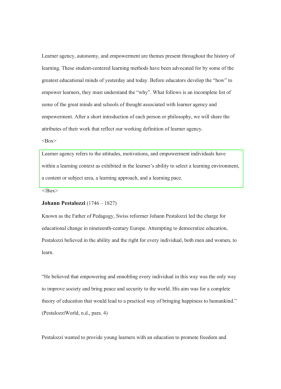

aspect Ratio 7.938271604938271
206885.0


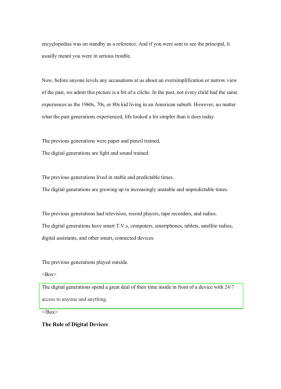

aspect Ratio 15.129411764705882
107940.0


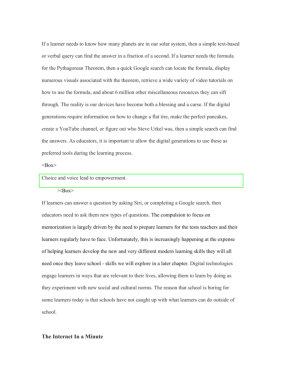

aspect Ratio 5.4033613445378155
304545.0


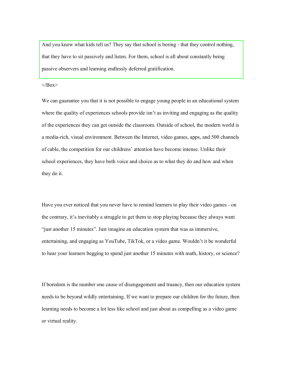

aspect Ratio 5.4033613445378155
304545.0


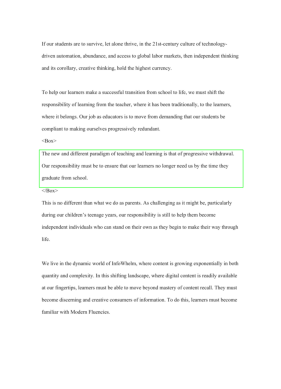

aspect Ratio 3.9937888198757765
412485.0


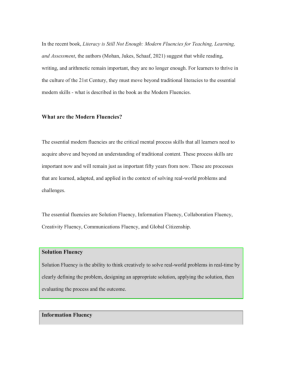

aspect Ratio 3.2311557788944723
510145.0


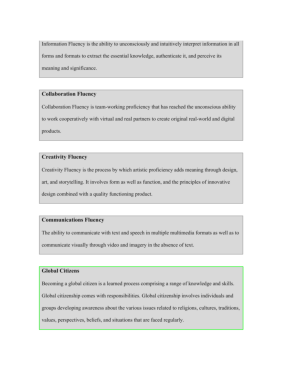

aspect Ratio 5.270491803278689
312255.0


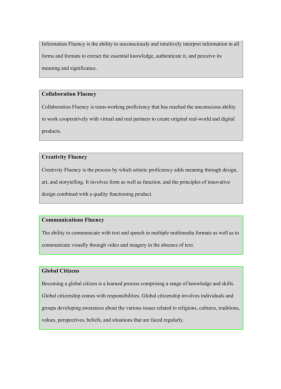

aspect Ratio 4.006230529595015
411200.0


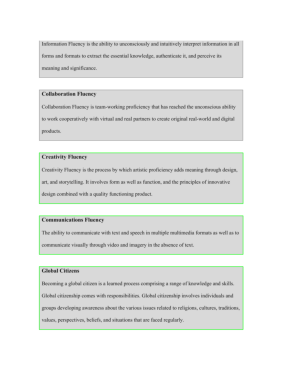

aspect Ratio 4.006230529595015
411200.0


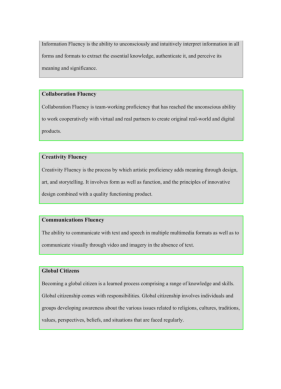

aspect Ratio 4.669014084507042
374975.0


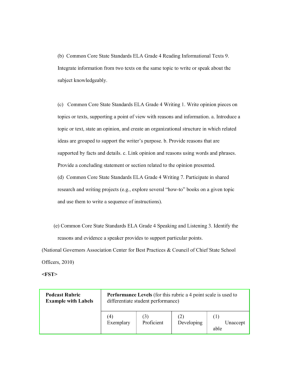

The total detected objects are 14


In [13]:
import cv2
import pytesseract
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np

def convert_pdf_to_images(pdf_path):
    # Convert PDF pages to images
    images = convert_from_path(pdf_path)
    objs = 0
    for i in images:
        objs += detect_boxes(i)
    print("The total detected objects are",objs)
    return images

import cv2

def detect_boxes(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)
    
    # Apply adaptive thresholding to segment the image
    _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    processed_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
    min_area = 1500  # Minimum contour area to consider as a box
    min_aspect_ratio = 1.5
    no_of_objs = 0
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        # if h > 1000 and x > 0.4*processed_image.shape[0]:
        area = cv2.contourArea(contour)
        aspect_ratio = w / float(h)
        if area > min_area and aspect_ratio > min_aspect_ratio:
            # detected_boxes.append((x, y, w, h))

            # print(processed_image.shape[0])
             _, num_contours, _ = cv2.findContours(thresholded[y:y+h, x:x+w], cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
            if len(num_contours) > 10:  # Adjust the threshold as per your requirement
                continue
            
            # Exclude contours that do not adhere to a grid-like pattern
            _, _, stats, _ = cv2.connectedComponentsWithStats(thresholded[y:y+h, x:x+w], connectivity=8)
            for stat in stats:
                if stat[4] > 0 and (stat[2] > w * 0.8 or stat[3] > h * 0.8):
                    continue
            
            cv2.rectangle(processed_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cropped_image = gray[y:y+h, x:x+w]
            pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
            text = pytesseract.image_to_string(cropped_image).strip()
            # print("Detected text:", text)
            if len(text)>10:
                print("aspect Ratio",aspect_ratio)
                print(area)
                # print(x,y,w,h)
                no_of_objs += 1
                image_rgb = cv2.cvtColor(np.array(processed_image), cv2.COLOR_BGR2RGB)
                # Display the image
                plt.imshow(image_rgb)
                plt.axis('off')
                plt.show()
    return no_of_objs
            
    # return processed_image
                
    return image

# sid_bars = convert_pdf_to_images("/home/ubuntu/ritesh_manchikanti/Bigbird/side_bar/Roufa.pdf")
sid_bars = convert_pdf_to_images("/home/ubuntu/ritesh_manchikanti/Bigbird/side_bar/15031-4983-FullBook.pdf")

In [18]:
import cv2
import pytesseract
from pdf2image import convert_from_path
import matplotlib.pyplot as plt
import numpy as np

def convert_pdf_to_images(pdf_path):
    # Convert PDF pages to images
    images = convert_from_path(pdf_path)
    objs = 0
    for i in images:
        objs += detect_boxes(i)
    print("The total detected objects are",objs)
    return images

import cv2

def detect_boxes(image):
    # Convert the image to grayscale
    gray = cv2.cvtColor(np.array(image), cv2.COLOR_BGR2GRAY)
    
    # Apply adaptive thresholding to segment the image
    _, thresholded = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
    
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    processed_image = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
    min_area = 1500  # Minimum contour area to consider as a box
    min_aspect_ratio = 1.5
    no_of_objs = 0
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        # if h > 1000 and x > 0.4*processed_image.shape[0]:
        area = cv2.contourArea(contour)
        aspect_ratio = w / float(h)
        if area > min_area and aspect_ratio > min_aspect_ratio:
            # detected_boxes.append((x, y, w, h))

            # print(processed_image.shape[0])
            num_contours, _ = cv2.findContours(thresholded[y:y+h, x:x+w], cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
            if len(num_contours) > 10:  # Adjust the threshold as per your requirement
                continue
            
            # Exclude contours that do not adhere to a grid-like pattern
            _, _, stats, _ = cv2.connectedComponentsWithStats(thresholded[y:y+h, x:x+w], connectivity=8)
            for stat in stats:
                if stat[4] > 0 and (stat[2] > w * 0.8 or stat[3] > h * 0.8):
                    continue
            
            cv2.rectangle(processed_image, (x, y), (x + w, y + h), (0, 255, 0), 2)
            cropped_image = gray[y:y+h, x:x+w]
            pytesseract.pytesseract.tesseract_cmd = '/usr/bin/tesseract'
            text = pytesseract.image_to_string(cropped_image).strip()
            # print("Detected text:", text)
            if len(text)>10:
                print("aspect Ratio",aspect_ratio)
                print(area)
                # print(x,y,w,h)
                no_of_objs += 1
                image_rgb = cv2.cvtColor(np.array(processed_image), cv2.COLOR_BGR2RGB)
                # Display the image
                plt.imshow(image_rgb)
                plt.axis('off')
                plt.show()
    return no_of_objs
            
    # return processed_image
                
    # return image

# sid_bars = convert_pdf_to_images("/home/ubuntu/ritesh_manchikanti/Bigbird/side_bar/Roufa.pdf")
sid_bars = convert_pdf_to_images("/home/ubuntu/ritesh_manchikanti/Bigbird/side_bar/15031-4983-FullBook.pdf")

The total detected objects are 0
